# Problema
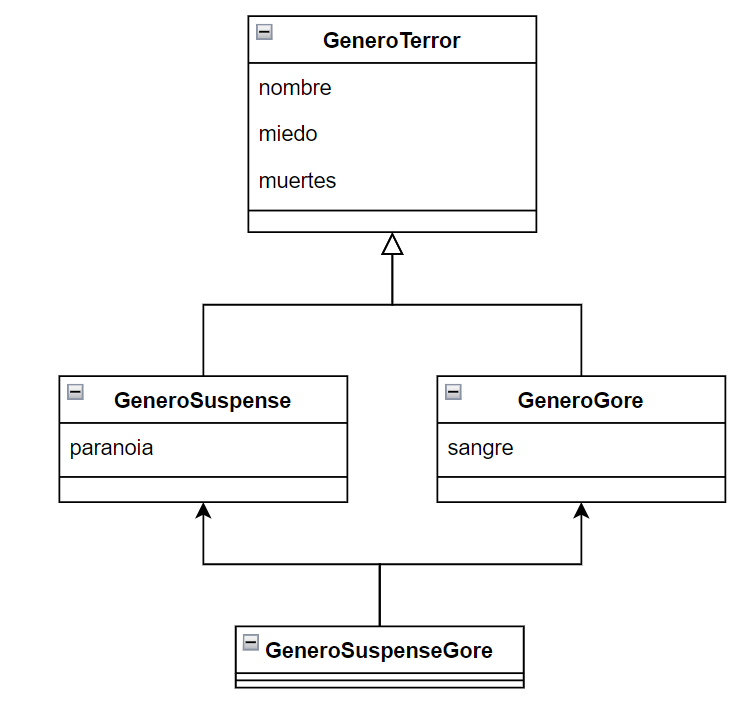

In [2]:
class GeneroTerror():
    
    def __init__(self, nombre, miedo, muertes):
        self.nombre = nombre
        self.miedo = miedo
        self.muertes = muertes
        print("Pelicula de genero de Terror")
        
    def __str__(self):
        return '''
        > Nombre: {}
        > Miedo: {}
        > Muertes: {}'''.format(self.nombre, self.miedo, self.muertes)
    
class GeneroSuspense(GeneroTerror):
    
    def __init__(self, nombre, miedo, muertes, paranoia):
        super().__init__(nombre, miedo, muertes)
        self.paranoia = paranoia
        print("Pelicula de subgenero Suspense")
        
    def __str__(self):
        return super().__str__() + '''
        > Paranoia: {}'''.format(self.paranoia)
    
class GeneroGore(GeneroTerror):
    
    def __init__(self, nombre, miedo, muertes, sangre):
        super().__init__(nombre, miedo, muertes)
        self.sangre = sangre
        print("Pelicula de subgenero Gore")
        
    def __str__(self):
        return super().__str__() + '''
        > Gore: {}'''.format(self.sangre)
    
class GeneroSuspenseGore(GeneroSuspense, GeneroGore):
    
    def __init__(self, nombre, miedo, muertes, paranoia, sangre):
        super().__init__(nombre, miedo, muertes, paranoia)
        GeneroGore.__init__(self, nombre, miedo, muertes, sangre)
        
    def __str__(self):
        return super().__str__()
    
s1 = GeneroSuspense("Los Otros", 65, 2, 75)
g1 = GeneroGore("Infierno Verde", 70, 10, 90)
sg1 = GeneroSuspenseGore("Frágiles", 75, 7, 80, 90)
print(s1)
print("="*40)
print(g1)
print("="*40)
print(sg1)

Pelicula de genero de Terror
Pelicula de subgenero Suspense
Pelicula de genero de Terror
Pelicula de subgenero Gore


TypeError: __init__() missing 1 required positional argument: 'sangre'

# Solución
1. Con herencia múltiple NO usar super()
2. Con herencia múltiple implementar parámetros con None en los constructores

In [10]:
class GeneroTerror():
    
    def __init__(self, nombre=None, miedo=None, muertes=None):
        self.nombre = nombre
        self.miedo = miedo
        self.muertes = muertes
        #print("Pelicula de genero de Terror")
        
    def __str__(self):
        return '''
        > Nombre: {}
        > Miedo: {}
        > Muertes: {}'''.format(self.nombre, self.miedo, self.muertes)
    
class GeneroSuspense(GeneroTerror):
    
    def __init__(self, nombre=None, miedo=None, muertes=None, paranoia=None):
        GeneroTerror.__init__(self, nombre, miedo, muertes)
        self.paranoia = paranoia
        #print("Pelicula de subgenero Suspense")
        
    def __str__(self):
        return GeneroTerror.__str__(self) + '''
        > Paranoia: {}'''.format(self.paranoia)
    
class GeneroGore(GeneroTerror):
    
    def __init__(self, nombre=None, miedo=None, muertes=None, sangre=None):
        GeneroTerror.__init__(self, nombre, miedo, muertes)
        self.sangre = sangre
        #print("Pelicula de subgenero Gore")
        
    def __str__(self):
        return GeneroTerror.__str__(self) + '''
        > Sangre: {}'''.format(self.sangre)
    
class GeneroSuspenseGore(GeneroSuspense, GeneroGore):
    
    def __init__(self, nombre=None, miedo=None, muertes=None, paranoia=None, sangre=None):
        # Rellenamos en el orden de la herencia de poco a mucho
        GeneroSuspense.__init__(self, paranoia=paranoia)
        GeneroGore.__init__(self, nombre, miedo, muertes, sangre)
        
    def __str__(self):
        return GeneroTerror.__str__(self) + '''
        > Paranoia: {}
        > Sangre: {}'''.format(self.paranoia, self.sangre)

# Invertimos el orden de la herencia para ver como funcionaria
class GeneroSuspenseGore_v2(GeneroGore, GeneroSuspense):

    def __init__(self, nombre=None, miedo=None, muertes=None, paranoia=None, sangre=None):
        # Rellenamos en el orden de la herencia de poco a mucho
        GeneroGore.__init__(self, sangre=sangre)
        GeneroSuspense.__init__(self, nombre, miedo, muertes, paranoia)
        
    def __str__(self):
        return GeneroTerror.__str__(self) + '''
        > Paranoia: {}
        > Sangre: {}'''.format(self.paranoia, self.sangre)
        
s1 = GeneroSuspense("Los Otros", 65, 2, 75)
g1 = GeneroGore("Infierno Verde", 70, 10, 90)
sg1 = GeneroSuspenseGore("Frágiles", 75, 7, 80, 90)
sg2 = GeneroSuspenseGore_v2('Frágiles 2',75 ,7 ,80 ,90)

lista = [s1, g1, sg1, sg2]
for i in lista:
    print(i)


        > Nombre: Los Otros
        > Miedo: 65
        > Muertes: 2
        > Paranoia: 75

        > Nombre: Infierno Verde
        > Miedo: 70
        > Muertes: 10
        > Sangre: 90

        > Nombre: Frágiles
        > Miedo: 75
        > Muertes: 7
        > Paranoia: 80
        > Sangre: 90

        > Nombre: Frágiles 2
        > Miedo: 75
        > Muertes: 7
        > Paranoia: 80
        > Sangre: 90
